In [1]:
import pandas as pd
import numpy as np

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'

In [3]:
!wget $data

--2023-09-24 16:17:35--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv.3’

housing.csv.3       100%[===================>]   1.36M  --.-KB/s    in 0.09s   

2023-09-24 16:17:35 (14.9 MB/s) - ‘housing.csv.3’ saved [1423529/1423529]



In [4]:
df = pd.read_csv(data)

In [5]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [7]:
df['ocean_proximity'] = df['ocean_proximity'].str.lower().str.replace(' ','_')

In [8]:
df['ocean_proximity'].unique()

array(['near_bay', '<1h_ocean', 'inland', 'near_ocean', 'island'],
      dtype=object)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='median_house_value', ylabel='Count'>

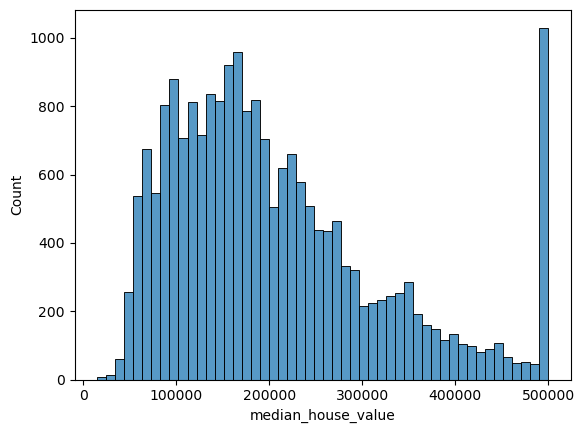

In [10]:
sns.histplot(df.median_house_value, bins = 50)

In [11]:
# Question 1 answer
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [72]:
# filter the dataframe based on 'ocean_proximity' is either '<1H OCEAN' or 'INLAND'
filter_df = df[df['ocean_proximity'].isin(['<1h_ocean','inland'])]
filter_df['ocean_proximity']

701      <1h_ocean
830      <1h_ocean
859      <1h_ocean
860      <1h_ocean
861      <1h_ocean
           ...    
20635       inland
20636       inland
20637       inland
20638       inland
20639       inland
Name: ocean_proximity, Length: 15687, dtype: object

In [73]:
selected_columns = [
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value'
]

# select only columns from filter column
subset_df = filter_df[selected_columns]

In [74]:
subset_df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [15]:
# Question 2 answer
medium_population = subset_df['population'].median()
medium_population

1195.0

In [16]:
# Prepare and split the data set 
# first check the data column how to separate
n = len(subset_df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [17]:
n_train, n_val, n_test

(9413, 3137, 3137)

In [18]:
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 15684, 15685, 15686])

In [19]:
np.random.seed(2)
np.random.shuffle(idx)

In [20]:
df_train = subset_df.iloc[idx[:n_train]]
df_val = subset_df.iloc[idx[n_train:n_train+n_val]]
df_test = subset_df.iloc[idx[n_train+n_val:]]

In [21]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test= df_test.reset_index(drop=True)

In [22]:
df_train.isnull().sum()

latitude               0
longitude              0
housing_median_age     0
total_rooms            0
total_bedrooms        99
population             0
households             0
median_income          0
median_house_value     0
dtype: int64

In [23]:
df_val.isnull().sum()

latitude               0
longitude              0
housing_median_age     0
total_rooms            0
total_bedrooms        21
population             0
households             0
median_income          0
median_house_value     0
dtype: int64

In [24]:
df_test.isnull().sum()

latitude               0
longitude              0
housing_median_age     0
total_rooms            0
total_bedrooms        37
population             0
households             0
median_income          0
median_house_value     0
dtype: int64

In [25]:
df_train_mean = df_train.fillna(df_train.mean())
df_val_mean = df_val.fillna(df_val.mean())
df_test_mean = df_test.fillna(df_test.mean())

In [26]:
df_train_zero = df_train.fillna(0)
df_val_zero = df_val.fillna(0)
df_test_zero = df_test.fillna(0)

In [27]:
df_train_mean = df_train_mean.drop('median_house_value', axis=1)
df_val_mean = df_val_mean.drop('median_house_value', axis = 1)
df_test_mean = df_test_mean.drop('median_house_value', axis = 1)

In [28]:
df_train_zero = df_train_zero.drop('median_house_value', axis=1)
df_val_zero = df_val_zero.drop('median_house_value', axis = 1)
df_test_zero = df_test_zero.drop('median_house_value', axis = 1)

In [29]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [32]:
model_mean = LinearRegression()
model_mean.fit(df_train_mean, y_train)

LinearRegression()

In [33]:
model_zero = LinearRegression()
model_zero.fit(df_train_zero,y_train)

LinearRegression()

In [35]:
y_pred_mean = model_mean.predict(df_val_mean)
y_pred_mean

array([13.19761039, 12.17309075, 11.66647655, ..., 11.39879097,
       11.8392814 , 12.11125738])

In [36]:
y_pred_zero = model_zero.predict(df_val_zero)
y_pred_zero

array([13.19670179, 12.17563333, 11.66055913, ..., 11.41230219,
       11.83721222, 12.11399221])

In [42]:
# Root mean squared error (on Validation set)
rmse_mean = round(np.sqrt(mean_squared_error(y_val,y_pred_mean)),2)
rmse_mean

0.34

In [41]:
rmse_zero = round(np.sqrt(mean_squared_error(y_val,y_pred_zero)),2)
rmse_zero

0.34

In [43]:
X_train = df_train_zero
X_val = df_val_zero
X_test = df_test_zero

In [46]:
from sklearn.linear_model import Ridge

In [60]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    model = Ridge(alpha=r)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = round(np.sqrt(mean_squared_error(y_val, y_pred)),2)
    print('R values is: ',r,'Root mean squared error value is: ',rmse)

R values is:  0 Root mean squared error value is:  0.34
R values is:  1e-06 Root mean squared error value is:  0.34
R values is:  0.0001 Root mean squared error value is:  0.34
R values is:  0.001 Root mean squared error value is:  0.34
R values is:  0.01 Root mean squared error value is:  0.34
R values is:  0.1 Root mean squared error value is:  0.34
R values is:  1 Root mean squared error value is:  0.34
R values is:  5 Root mean squared error value is:  0.34
R values is:  10 Root mean squared error value is:  0.34


Question No.5

In [86]:
from sklearn.model_selection import train_test_split

In [78]:
subset_df = subset_df.fillna(0)

In [79]:
subset_df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0


In [97]:
# for splitting the dataset train_test_split will be used
X = subset_df.drop('median_house_value', axis = 1)
y = np.log1p(subset_df['median_house_value'].values)

In [98]:
def split_data(X,y,seed):
    # Perform the train/validation/test split with a 60%/20%/20% distribution
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=seed)
    # first split into 60%, 40% and take 40% into split again to get the test and validation set 20%
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=seed)
    
    return X_train,X_val,X_test,y_train,y_val,y_test

In [100]:
rmse_scores = []
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    # Split the data using split_data function with the current seed
    X_train, X_val, X_test, y_train, y_val, y_test = split_data(X, y, seed)
    
    # Train a linear regression model on the training data with missing values filled with zeros
    model_zero = LinearRegression()
    model_zero.fit(X_train, y_train)
    
    # Make predictions on the validation dataset
    y_pred_zero = model_zero.predict(X_val)
    
    # Calculate the RMSE for the model on the validation dataset
    rmse_zero = np.sqrt(mean_squared_error(y_val, y_pred_zero))
    
    # Append the RMSE score to the list
    rmse_scores.append(rmse_zero)
    
    
    print("Seed values are: ",seed,"Rmse_scores are:", rmse_zero)
    
# Calculate the standard deviation of all RMSE scores
std_deviation = round(np.std(rmse_scores), 3)

# Print the standard deviation
print(f"Standard Deviation of RMSE Scores: {std_deviation}")

Seed values are:  0 Rmse_scores are: 0.3369895160601118
Seed values are:  1 Rmse_scores are: 0.33088847417395445
Seed values are:  2 Rmse_scores are: 0.34378970555758603
Seed values are:  3 Rmse_scores are: 0.34554877403043827
Seed values are:  4 Rmse_scores are: 0.330431543631929
Seed values are:  5 Rmse_scores are: 0.33943477820687595
Seed values are:  6 Rmse_scores are: 0.33682266307981973
Seed values are:  7 Rmse_scores are: 0.32829623374808414
Seed values are:  8 Rmse_scores are: 0.3376595817306674
Seed values are:  9 Rmse_scores are: 0.346135139210004
Standard Deviation of RMSE Scores: 0.006


In [101]:
X_train,X_val,X_test,y_train,y_val,y_test = split_data(X,y,9)

In [103]:
# combine the train and validation set into one dataset
X_full_train = pd.concat([X_train,X_val])

In [106]:
# combine the train and validation set into one dataset for y 
y_full_train = np.concatenate([y_train,y_val])

In [109]:
# train the model with r =0.001
model = Ridge(alpha=0.001)
model.fit(X_full_train, y_full_train)
y_pred = model.predict(X_test)
rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)),2)
print('Root mean squared error value is: ',rmse)

Root mean squared error value is:  0.34
